In [17]:
import anfis
import membership.mfDerivs
import membership.membershipfunction
import numpy
import matplotlib.pyplot as plt

ts = numpy.load(
    "/home/estebanp/fuzzy-control/anfis/anfis/datos.npy")

# Normalize
ts = ts / ts.max(axis=0)

# Datos

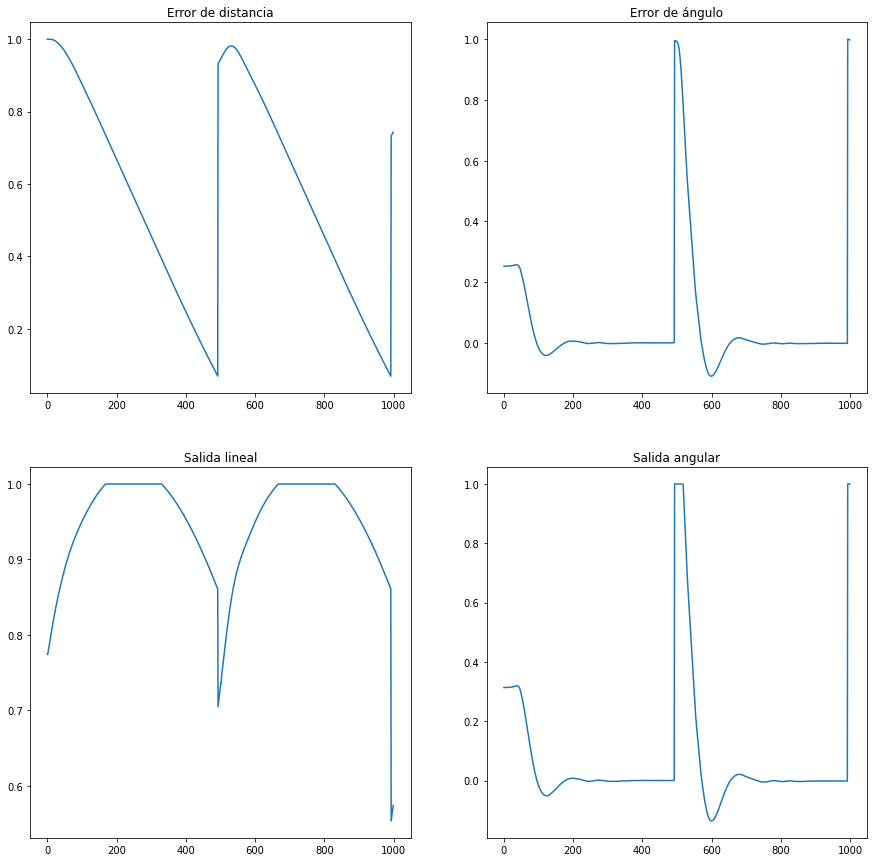

In [18]:


plt.subplots_adjust()
plt.subplot(2, 2, 1)
plt.plot(ts[:, 0])
plt.title("Error de distancia")

plt.subplot(2, 2, 2)
plt.plot(ts[:, 1])
plt.title("Error de ángulo")

plt.subplot(2, 2, 3)
plt.plot(ts[:, 2])
plt.title("Salida lineal")

plt.subplot(2, 2, 4)
plt.plot(ts[:, 3])
plt.title("Salida angular")


plt.gcf().set_size_inches(15, 15)
plt.show()

# Controlador lineal

In [19]:
X = ts[:, 0:2]
Y = ts[:, 2]

## Gaussian MFs

### 3 MFs

current error: 0.15557426862218787
Plotting errors


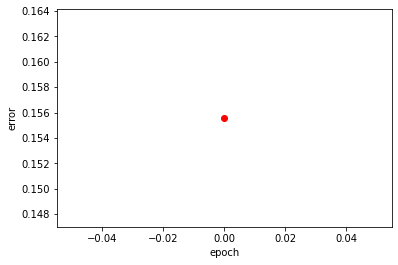

Plotting results


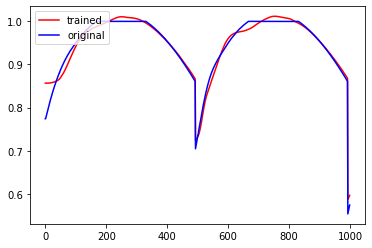

In [22]:
mf = [[['gaussmf', {'mean': 0., 'sigma': 1.}], ['gaussmf', {'mean': 0.5, 'sigma': 1}], ['gaussmf', {'mean': 1, 'sigma': 1.}]],
      [['gaussmf', {'mean': 0., 'sigma': 1.}], ['gaussmf', {'mean': 0.5, 'sigma': 1}], ['gaussmf', {'mean': 1, 'sigma': 1.}]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

### 4 MFs

In [ ]:
mf = [[['gaussmf', {'mean': 0., 'sigma': 1.}], ['gaussmf', {'mean': 0.3, 'sigma': 1}], ['gaussmf', {'mean': 0.6, 'sigma': 1.}], ['gaussmf', {'mean': 1., 'sigma': 1.}]],
      [['gaussmf', {'mean': 0., 'sigma': 1.}], ['gaussmf', {'mean': 0.3, 'sigma': 1}], ['gaussmf', {'mean': 0.6, 'sigma': 1.}], ['gaussmf', {'mean': 1., 'sigma': 1.}]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

### 5 MFs

In [ ]:
mf = [[['gaussmf', {'mean': 0., 'sigma': 1.}], ['gaussmf', {'mean': 0.25, 'sigma': 1}], ['gaussmf', {'mean': 0.5, 'sigma': 1.}], ['gaussmf', {'mean': 7.5, 'sigma': 1.}], ['gaussmf', {'mean': 1., 'sigma': 1.}]],
[['gaussmf', {'mean': 0., 'sigma': 1.}], ['gaussmf', {'mean': 0.25, 'sigma': 1}], ['gaussmf', {'mean': 0.5, 'sigma': 1.}], ['gaussmf', {'mean': 7.5, 'sigma': 1.}], ['gaussmf', {'mean': 1., 'sigma': 1.}]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

## Generalized Bell MFs

### 3 MFs

In [24]:
mf = [[['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0 }], ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.5 }],
       ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':1 }]],
      [['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0 }], ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.5 }],
       ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':1 }]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

current error: 0.05504026939745738


KeyboardInterrupt: 

### 4 MFs

In [ ]:
mf = [[['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0 }], ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.3 }],
       ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.6 }],['gbellmf', {'a': 0.5, 'b': 0.5, 'c':1 }]],
      [['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0 }], ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.3 }],
       ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.6 }],['gbellmf', {'a': 0.5, 'b': 0.5, 'c':1 }]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

### 5 MFs

In [25]:
mf = [[['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0 }], ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.25 }],
       ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.5 }],['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.75 }],
       ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':1 }]],
      [['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0 }], ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.25 }],
       ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.5 }],['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.75 }],
       ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':1 }]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

current error: 0.04791951649758813


KeyboardInterrupt: 

## Sigmoid MFs

### 3 MFs

In [26]:
mf = [[['sigmf', {'b': 0, 'c':1 }], ['sigmf', {'b': 0.5, 'c':1 }],
       ['sigmf', {'b': 1, 'c':1 }]],
      [['sigmf', {'b': 0, 'c':1 }], ['sigmf', {'b': 0.5, 'c':1 }],
       ['sigmf', {'b': 1, 'c':1 }]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

current error: 0.37332427960928805
current error: 0.36665291292113295


KeyboardInterrupt: 

### 4 MFs

In [ ]:
mf = [[['sigmf', {'b': 0, 'c':1 }], ['sigmf', {'b': 0.3, 'c':1 }],
       ['sigmf', {'b': 0.6, 'c':1 }],['sigmf', {'b': 1, 'c':1 }]],
      [['sigmf', {'b': 0, 'c':1 }], ['sigmf', {'b': 0.3, 'c':1 }],
       ['sigmf', {'b': 0.6, 'c':1 }],['sigmf', {'b': 1, 'c':1 }]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

### 5 MFs

In [ ]:
mf = [[['sigmf', {'b': 0, 'c':1 }], ['sigmf', {'b': 0.25, 'c':1 }],
       ['sigmf', {'b': 0.5, 'c':1 }],['sigmf', {'b': 0.75, 'c':1 }],['sigmf', {'b': 1., 'c':1 }]],
      [['sigmf', {'b': 0, 'c':1 }], ['sigmf', {'b': 0.25, 'c':1 }],
       ['sigmf', {'b': 0.5, 'c':1 }],['sigmf', {'b': 0.75, 'c':1 }],['sigmf', {'b': 1., 'c':1 }]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

# Controlador Angular

In [ ]:
X = ts[:, 0:2]
Y = ts[:, 3]

## Gaussian MFs

### 3 MFs

current error: 0.15557426862218787
Plotting errors


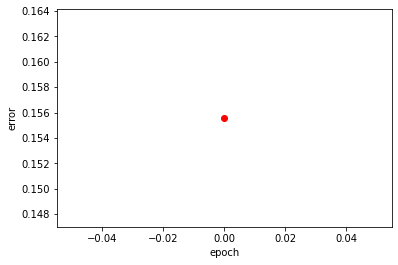

Plotting results


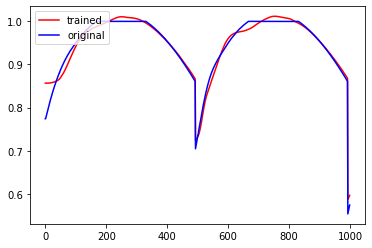

In [ ]:
mf = [[['gaussmf', {'mean': 0., 'sigma': 1.}], ['gaussmf', {'mean': 0.5, 'sigma': 1}], ['gaussmf', {'mean': 1, 'sigma': 1.}]],
      [['gaussmf', {'mean': 0., 'sigma': 1.}], ['gaussmf', {'mean': 0.5, 'sigma': 1}], ['gaussmf', {'mean': 1, 'sigma': 1.}]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

### 4 MFs

In [ ]:
mf = [[['gaussmf', {'mean': 0., 'sigma': 1.}], ['gaussmf', {'mean': 0.3, 'sigma': 1}], ['gaussmf', {'mean': 0.6, 'sigma': 1.}], ['gaussmf', {'mean': 1., 'sigma': 1.}]],
      [['gaussmf', {'mean': 0., 'sigma': 1.}], ['gaussmf', {'mean': 0.3, 'sigma': 1}], ['gaussmf', {'mean': 0.6, 'sigma': 1.}], ['gaussmf', {'mean': 1., 'sigma': 1.}]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

### 5 MFs

In [ ]:
mf = [[['gaussmf', {'mean': 0., 'sigma': 1.}], ['gaussmf', {'mean': 0.25, 'sigma': 1}], ['gaussmf', {'mean': 0.5, 'sigma': 1.}], ['gaussmf', {'mean': 7.5, 'sigma': 1.}], ['gaussmf', {'mean': 1., 'sigma': 1.}]],
[['gaussmf', {'mean': 0., 'sigma': 1.}], ['gaussmf', {'mean': 0.25, 'sigma': 1}], ['gaussmf', {'mean': 0.5, 'sigma': 1.}], ['gaussmf', {'mean': 7.5, 'sigma': 1.}], ['gaussmf', {'mean': 1., 'sigma': 1.}]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

## Generalized Bell MFs

### 3 MFs

In [ ]:
mf = [[['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0 }], ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.5 }],
       ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':1 }]],
      [['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0 }], ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.5 }],
       ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':1 }]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

current error: 0.05504026939745738


KeyboardInterrupt: 

### 4 MFs

In [ ]:
mf = [[['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0 }], ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.3 }],
       ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.6 }],['gbellmf', {'a': 0.5, 'b': 0.5, 'c':1 }]],
      [['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0 }], ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.3 }],
       ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.6 }],['gbellmf', {'a': 0.5, 'b': 0.5, 'c':1 }]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

### 5 MFs

In [ ]:
mf = [[['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0 }], ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.25 }],
       ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.5 }],['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.75 }],
       ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':1 }]],
      [['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0 }], ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.25 }],
       ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.5 }],['gbellmf', {'a': 0.5, 'b': 0.5, 'c':0.75 }],
       ['gbellmf', {'a': 0.5, 'b': 0.5, 'c':1 }]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

current error: 0.04791951649758813


KeyboardInterrupt: 

## Sigmoid MFs

### 3 MFs

In [ ]:
mf = [[['sigmf', {'b': 0, 'c':1 }], ['sigmf', {'b': 0.5, 'c':1 }],
       ['sigmf', {'b': 1, 'c':1 }]],
      [['sigmf', {'b': 0, 'c':1 }], ['sigmf', {'b': 0.5, 'c':1 }],
       ['sigmf', {'b': 1, 'c':1 }]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

current error: 0.37332427960928805
current error: 0.36665291292113295


KeyboardInterrupt: 

### 4 MFs

In [ ]:
mf = [[['sigmf', {'b': 0, 'c':1 }], ['sigmf', {'b': 0.3, 'c':1 }],
       ['sigmf', {'b': 0.6, 'c':1 }],['sigmf', {'b': 1, 'c':1 }]],
      [['sigmf', {'b': 0, 'c':1 }], ['sigmf', {'b': 0.3, 'c':1 }],
       ['sigmf', {'b': 0.6, 'c':1 }],['sigmf', {'b': 1, 'c':1 }]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

### 5 MFs

In [ ]:
mf = [[['sigmf', {'b': 0, 'c':1 }], ['sigmf', {'b': 0.25, 'c':1 }],
       ['sigmf', {'b': 0.5, 'c':1 }],['sigmf', {'b': 0.75, 'c':1 }],['sigmf', {'b': 1., 'c':1 }]],
      [['sigmf', {'b': 0, 'c':1 }], ['sigmf', {'b': 0.25, 'c':1 }],
       ['sigmf', {'b': 0.5, 'c':1 }],['sigmf', {'b': 0.75, 'c':1 }],['sigmf', {'b': 1., 'c':1 }]]]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)

anf.trainHybridJangOffLine(epochs=20)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

# Análisis de resultados